The aim of this notebook is to understand the various learnt latent factors.

In [1]:
import numpy as np
import pandas as pd
import sys
from common import compute_rmse_fraction


In [2]:
from mf_core import *

import numpy as np
import pandas as pd
import sys
from create_matrix import *
from sklearn.model_selection import LeaveOneOut

import pickle
from tensor_custom_core import *
from degree_days import dds

In [5]:
def learn_lf(region, year, a, b, APPLIANCES=['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']):


    def un_normalize(x, maximum, minimum):
        return (maximum-minimum)*x + minimum





    pred = {}
    lat = {}
    for appliance in APPLIANCES[:]:
        lat[appliance] = {}
        pred[appliance] = {}
        if appliance == "hvac":
            start, stop = 5, 11
        else:
            start, stop = 1, 13
        months = stop - start
        pred[appliance] = {}
        appliance_df = create_matrix_region_appliance_year(region, year, appliance, all=False)
        aggregate_cols = [x for x in appliance_df.columns if "aggregate" in x]
        appliance_cols = [x for x in appliance_df.columns if appliance in x]
        energy_cols = np.concatenate([aggregate_cols, appliance_cols])

        df = appliance_df.copy()
        dfc = df.copy()
        static_cols = ['area', 'total_occupants', 'num_rooms']
        static_df = df[static_cols]
        static_df = static_df.div(static_df.max())
        weather_values = np.array(dds[2014]['Austin'][start-1:stop-1]).reshape(-1,1)

        df = df[energy_cols]
        col_max = df.max().max()
        col_min = df.min().min()
        #df = (1.0*(df-col_min))/(col_max-col_min)
        print df.describe()
        tensor = df.values.reshape((len(df), 2, months))
    
        M, N, O = tensor.shape
        print M, N, O
        mask = np.ones(M).astype('bool')

        case=2
        pred[appliance][case] = {}
        for a in range(1, 6):
            lat[appliance][a] = {}
            print "*"*20
            print a, case, appliance
            print "*"*20

            b = a
            pred[appliance][case][a] = {}
            for i, home in enumerate(df.index[:1]):


                tensor_copy = tensor.copy()
                tensor_copy[i, 1, :]=np.NaN
                H, A, T = learn_HAT(case, tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function='abs',
                                    H_known=static_df.values[:,:a])
                lat[appliance][a]['T'] = T
                lat[appliance][a]['A'] = A
                lat[appliance][a]['H'] = H
    return lat


In [4]:
%matplotlib inline

In [38]:
lat_sd = learn_lf('SanDiego', 2014, 3, 3)

       aggregate_1  aggregate_2  aggregate_3  aggregate_4  aggregate_5  \
count    20.000000    25.000000    27.000000    28.000000    35.000000   
mean    243.018291   207.786156   303.811413   303.014862   385.046320   
std     151.227842   135.592553   174.741250   177.947636   220.221878   
min       1.189850     3.184883    94.000481    82.503334    96.906616   
25%     151.906677   155.927017   174.484566   165.849434   217.095627   
50%     195.473175   179.204575   232.510040   265.114777   317.446136   
75%     396.982521   295.634735   402.535172   423.217537   509.796814   
max     464.899841   438.571686   884.684387   874.489319   968.830872   

       aggregate_6  aggregate_7  aggregate_8  aggregate_9  aggregate_10  \
count    35.000000    37.000000    36.000000    33.000000     30.000000   
mean    361.828077   500.349357   553.206728   610.588043    408.765929   
std     226.866036   289.728190   315.189695   336.923831    195.724981   
min     108.055588    28.621834  

********************
2 2 mw
********************
********************
3 2 mw
********************
********************
4 2 mw
********************
********************
5 2 mw
********************
       aggregate_1  aggregate_2  aggregate_3  aggregate_4  aggregate_5  \
count    20.000000    25.000000    27.000000    28.000000    35.000000   
mean    243.018291   207.786156   303.811413   303.014862   385.046320   
std     151.227842   135.592553   174.741250   177.947636   220.221878   
min       1.189850     3.184883    94.000481    82.503334    96.906616   
25%     151.906677   155.927017   174.484566   165.849434   217.095627   
50%     195.473175   179.204575   232.510040   265.114777   317.446136   
75%     396.982521   295.634735   402.535172   423.217537   509.796814   
max     464.899841   438.571686   884.684387   874.489319   968.830872   

       aggregate_6  aggregate_7  aggregate_8  aggregate_9  aggregate_10  \
count    35.000000    37.000000    36.000000    33.000000     

In [39]:
lat_austin = learn_lf('Austin', 2014, 3, 3)

       aggregate_1  aggregate_2  aggregate_3  aggregate_4  aggregate_5  \
count   375.000000   408.000000   427.000000   442.000000   452.000000   
mean    660.840981   567.035560   559.589831   597.122320   745.896280   
std     513.314258   445.459512   401.624453   460.906135   600.192972   
min       1.867500     7.855584    25.344334     6.232967    14.047050   
25%     377.019745   320.829483   332.834244   309.005600   382.746414   
50%     540.134338   465.294754   471.457825   501.793274   620.521606   
75%     797.684479   697.384628   715.929565   777.032578   963.034760   
max    6072.448242  5176.299805  5001.274902  5993.735352  7633.365723   

       aggregate_6  aggregate_7   aggregate_8  aggregate_9  aggregate_10  \
count   465.000000   480.000000    490.000000   493.000000    491.000000   
mean   1020.126372  1151.563518   1281.998236  1001.518678    808.282627   
std     701.828285   791.085429    892.920422   688.275239    560.780906   
min      63.819134     5.6809

********************
2 2 mw
********************
********************
3 2 mw
********************
********************
4 2 mw
********************
********************
5 2 mw
********************
       aggregate_1  aggregate_2  aggregate_3  aggregate_4  aggregate_5  \
count   375.000000   408.000000   427.000000   442.000000   452.000000   
mean    660.840981   567.035560   559.589831   597.122320   745.896280   
std     513.314258   445.459512   401.624453   460.906135   600.192972   
min       1.867500     7.855584    25.344334     6.232967    14.047050   
25%     377.019745   320.829483   332.834244   309.005600   382.746414   
50%     540.134338   465.294754   471.457825   501.793274   620.521606   
75%     797.684479   697.384628   715.929565   777.032578   963.034760   
max    6072.448242  5176.299805  5001.274902  5993.735352  7633.365723   

       aggregate_6  aggregate_7   aggregate_8  aggregate_9  aggregate_10  \
count   465.000000   480.000000    490.000000   493.000000   

In [7]:
import seaborn as sns

In [77]:
dds[2014]['Austin']

[0.012706480304955527,
 0.07369758576874205,
 0.09148665819567979,
 0.30495552731893266,
 0.5184243964421855,
 0.832274459974587,
 0.9085133418043202,
 1.0,
 0.747141041931385,
 0.4650571791613723,
 0.054637865311308764,
 0.03430749682337993]

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
lat = {'Austin':lat_austin,'SanDiego':lat_sd}

In [44]:
def append_weather(df, appliance, region):
    if appliance=="hvac":
        start, stop = 5, 11
    else:
        start, stop = 1, 13
    degree_days = dds[2014][region][start-1:stop-1]
    df.loc['Degree Days \n(Normalised)'] = degree_days
    return df

def append_mean_energy(df, appliance, region):
    appliance_df = create_matrix_region_appliance_year(region, 2014, appliance,all=True)
    appliance_cols = [x for x in appliance_df.columns if appliance in x]
    appliance_df = appliance_df[appliance_cols]
    appliance_df.columns = range(len(appliance_cols))
    appliance_energy = appliance_df.mean().div(appliance_df.mean().max())
    df.loc['Mean Energy \n(Normalised)'] = appliance_energy
    return df
    

def plot_heatmap_correlation(appliance="fridge", num_factors=1, region="Austin"):    
    df = pd.DataFrame(lat[region][appliance][num_factors]['T']).T
    df.index = ['Latent_'+str(x) for x in df.index]
    df = append_weather(df, appliance, region)
    df = append_mean_energy(df, appliance, region)

    sns.heatmap(df, annot=True)
    plt.figure()
    sns.heatmap(df.T.corr(), annot=True)

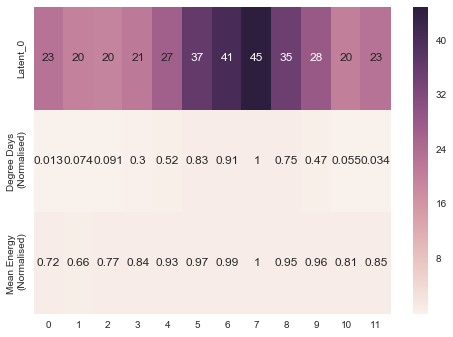

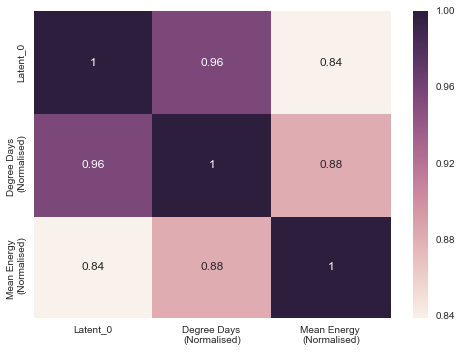

In [45]:
plot_heatmap_correlation('fridge',1,'Austin')

In [48]:
lat_sd['hvac'][1]['H'][:]

array([[ 0.64624877],
       [ 0.67608696],
       [ 1.79668043],
       [ 0.68478261],
       [ 0.89130435],
       [ 0.67608696],
       [ 0.52114256],
       [ 0.94782609],
       [ 0.60434783],
       [ 0.33077763],
       [ 0.63652174],
       [ 0.48695652],
       [ 0.26423244],
       [ 0.38685289],
       [ 0.80137987],
       [ 0.4726087 ],
       [ 0.68695652],
       [ 0.6726087 ],
       [ 0.47304348],
       [ 0.29130435],
       [ 0.64173913],
       [ 0.42403077],
       [ 0.14164478],
       [ 0.06659542],
       [ 0.89130435],
       [ 0.6726087 ],
       [ 0.74515947],
       [ 0.60869565],
       [ 0.60913043],
       [ 0.15805538],
       [ 0.70244489],
       [ 0.69565217],
       [ 0.60913043],
       [ 0.60869565],
       [ 0.35434196],
       [ 0.49111825],
       [ 0.13694344],
       [ 0.89130435],
       [ 0.19229355],
       [ 0.67608696],
       [ 1.        ],
       [ 0.50258744]])

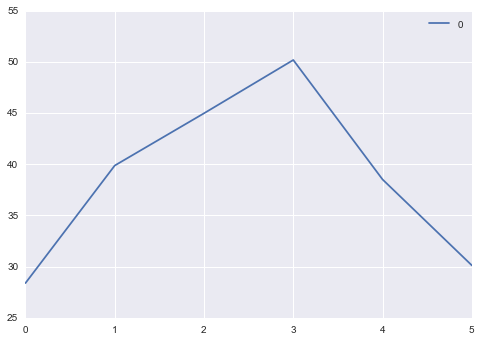

In [56]:
pd.DataFrame(lat_austin['hvac'][1]['T'][:]).plot()

In [64]:
lat_austin['fridge'][1]['A'][:]

array([[[ 102.25316575]],

       [[   5.46368947]]])

In [65]:
lat_sd['fridge'][1]['A'][:]

array([[[ 39.52330848]],

       [[  3.98780863]]])

In [62]:
39.6/0.677

58.49335302806499

In [63]:
102.26/1.05

97.39047619047619